Import Libraries:

In [3]:
#==== import needed libs ====#
from prophet.plot import add_changepoints_to_plot
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from matplotlib import pyplot
from prophet import Prophet
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import requests
import math
import lxml
import time
import csv
import io

In [8]:
#ticker = "SPY"
#stock = yf.download(ticker, period="9999d")
#stock.to_csv('SP500_50y.csv')
#stock = pd.read_csv('SP500_365d.csv')
#stock = pd.read_csv('SP500_10y.csv')
stock = pd.read_csv('SP500_20y.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.799770,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.983273,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.038315,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.313566,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.423655,531500


In [9]:
#df1 = stock.reset_index()
df1 = stock
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.799770,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.983273,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.038315,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.313566,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.423655,531500


In [10]:
df2 = pd.DataFrame(columns = ['ds', 'y'])

In [11]:
df2['ds'] = df1['Date']
df2['y'] = df1['Adj Close']
df2.head()

,ds,y
0,1993-01-29,25.799770
1,1993-02-01,25.983273
2,1993-02-02,26.038315
3,1993-02-03,26.313566
4,1993-02-04,26.423655


In [12]:
m = Prophet(daily_seasonality=True)
m.fit(df2)

In [13]:
future = m.make_future_dataframe(periods=730)
future.tail()

,ds
7911,2023-08-07
7912,2023-08-08
7913,2023-08-09
7914,2023-08-10
7915,2023-08-11


In [15]:
future2 = future.copy()
future2 = future2[future2['ds'].dt.dayofweek < 5]

In [16]:
forecast = m.predict(future2)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7807,2023-08-07,446.205946,417.610544,476.549273
7808,2023-08-08,446.297699,419.140494,474.508834
7809,2023-08-09,446.210099,419.798468,474.795249
7810,2023-08-10,446.106729,417.128945,476.571493
7811,2023-08-11,445.956978,418.775560,473.350400


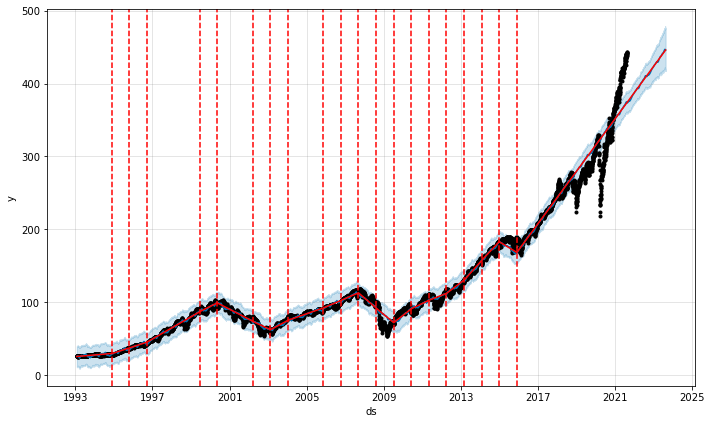

In [17]:
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)

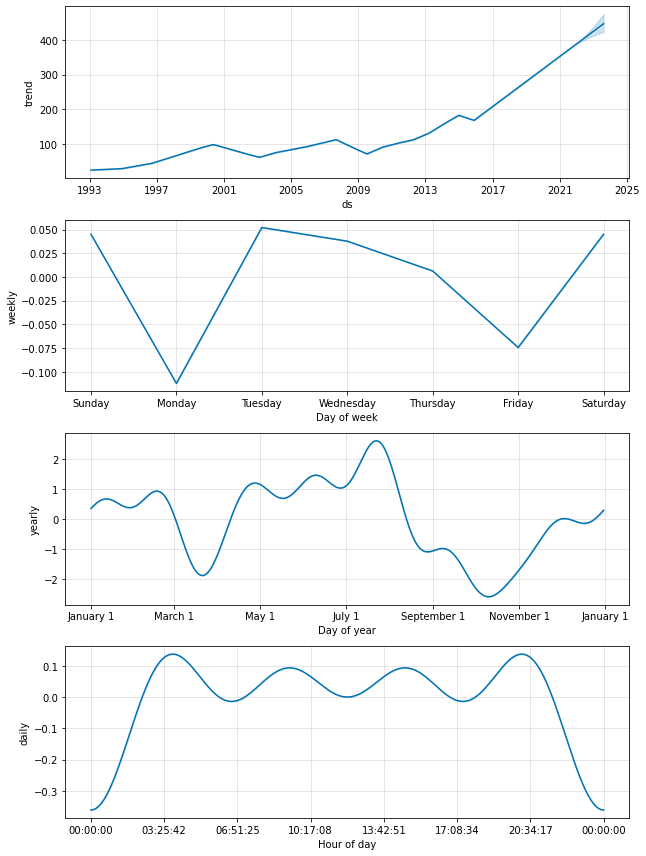

In [18]:
fig2 = m.plot_components(forecast)